In [652]:
import warnings
import numpy as np
import pandas as pd
import catboost as cb
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import StratifiedKFold
%matplotlib inline
%config inlinebackend.figure_format = 'svg'

warnings.simplefilter("ignore")

In [597]:
train = pd.read_csv('assignment_2_train.csv')
train

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,3166995,0,3958217,39.00,W,1877,310.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179996,3166996,0,3958237,59.95,W,10075,514.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179997,3166997,0,3958241,34.00,W,6053,122.0,150.0,mastercard,195.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179998,3166998,0,3958260,59.00,W,7726,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [476]:
X=train.drop('isFraud', axis=1)
y=train['isFraud']

In [477]:
y.value_counts()

0    174859
1      5141
Name: isFraud, dtype: int64

Задание 1: отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [478]:
train_num=X.select_dtypes(exclude='object')
X_train, X_test, y_train, y_test = train_test_split(train_num, y, test_size=0.33, random_state=101)

In [479]:
m_xgb=xgb.XGBClassifier(booster = 'gbtree')

In [596]:
train_num

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,86400,68.50,13926,NaN,150.0,142.0,315.0,87.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,86401,29.00,2755,404.0,150.0,102.0,325.0,87.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,86469,59.00,4663,490.0,150.0,166.0,330.0,87.0,287.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,86499,50.00,18132,567.0,150.0,117.0,476.0,87.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,86506,50.00,4497,514.0,150.0,102.0,420.0,87.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,3166995,3958217,39.00,1877,310.0,150.0,224.0,272.0,87.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179996,3166996,3958237,59.95,10075,514.0,150.0,224.0,315.0,87.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179997,3166997,3958241,34.00,6053,122.0,150.0,195.0,330.0,87.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179998,3166998,3958260,59.00,7726,555.0,150.0,226.0,272.0,87.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [480]:
m_xgb_num=m_xgb.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_metric='auc',
    early_stopping_rounds=10,
    verbose=20)

[0]	validation_0-auc:0.75919	validation_1-auc:0.76253
[20]	validation_0-auc:0.93534	validation_1-auc:0.90813
[40]	validation_0-auc:0.95741	validation_1-auc:0.92259
[60]	validation_0-auc:0.96780	validation_1-auc:0.92771
[80]	validation_0-auc:0.97481	validation_1-auc:0.93209
[99]	validation_0-auc:0.98079	validation_1-auc:0.93642


Задание 2: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.

In [481]:
m_xgb=xgb.XGBClassifier(booster = 'gbtree',seed=101)

In [551]:
train_cat=pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(train_cat, y, test_size=0.33, random_state=101)

In [483]:
m_xgb_cat=m_xgb.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_metric='auc',
    early_stopping_rounds=10,
    verbose=20)

[0]	validation_0-auc:0.75928	validation_1-auc:0.76267
[20]	validation_0-auc:0.94345	validation_1-auc:0.91518
[40]	validation_0-auc:0.96498	validation_1-auc:0.93091
[60]	validation_0-auc:0.97547	validation_1-auc:0.93659
[80]	validation_0-auc:0.98171	validation_1-auc:0.94088
[99]	validation_0-auc:0.98644	validation_1-auc:0.94271


Задание 3. Пропущено. Это критичный момент. Нельзя пропускать задания или менять их нумерацию.

Задание 4: для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [527]:
m_lgb= lgb.LGBMClassifier()
m_lgb1= lgb.LGBMClassifier()
m_lgb2= lgb.LGBMClassifier()

In [552]:
X_train, X_test, y_train, y_test = train_test_split(train_num, y, test_size=0.33, random_state=101)

In [529]:
m_lgb_num=m_lgb.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_metric='auc',
    early_stopping_rounds=10,
    verbose=20)

Training until validation scores don't improve for 10 rounds
[20]	training's auc: 0.909676	training's binary_logloss: 0.0726256	valid_1's auc: 0.895872	valid_1's binary_logloss: 0.0738265
[40]	training's auc: 0.934099	training's binary_logloss: 0.0622207	valid_1's auc: 0.911039	valid_1's binary_logloss: 0.0673315
[60]	training's auc: 0.951629	training's binary_logloss: 0.0557064	valid_1's auc: 0.918689	valid_1's binary_logloss: 0.0641282
[80]	training's auc: 0.96362	training's binary_logloss: 0.0507688	valid_1's auc: 0.924673	valid_1's binary_logloss: 0.0620816
[100]	training's auc: 0.970607	training's binary_logloss: 0.0471382	valid_1's auc: 0.92961	valid_1's binary_logloss: 0.0603943
Did not meet early stopping. Best iteration is:
[100]	training's auc: 0.970607	training's binary_logloss: 0.0471382	valid_1's auc: 0.92961	valid_1's binary_logloss: 0.0603943


Задание 5: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.

In [533]:
m_lgb= lgb.LGBMClassifier()

In [554]:
X_train, X_test, y_train, y_test = train_test_split(train_cat, y, test_size=0.33, random_state=101)


In [535]:
m_lgb_cat=m_lgb.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_metric='auc',
    early_stopping_rounds=10,
    verbose=20)

Training until validation scores don't improve for 10 rounds
[20]	training's auc: 0.914132	training's binary_logloss: 0.0708575	valid_1's auc: 0.900994	valid_1's binary_logloss: 0.0722921
[40]	training's auc: 0.941419	training's binary_logloss: 0.0594721	valid_1's auc: 0.919717	valid_1's binary_logloss: 0.0646614
[60]	training's auc: 0.959584	training's binary_logloss: 0.0524814	valid_1's auc: 0.929494	valid_1's binary_logloss: 0.0609734
[80]	training's auc: 0.969699	training's binary_logloss: 0.0475909	valid_1's auc: 0.933767	valid_1's binary_logloss: 0.0588977
[100]	training's auc: 0.977744	training's binary_logloss: 0.0436677	valid_1's auc: 0.937322	valid_1's binary_logloss: 0.0573163
Did not meet early stopping. Best iteration is:
[100]	training's auc: 0.977744	training's binary_logloss: 0.0436677	valid_1's auc: 0.937322	valid_1's binary_logloss: 0.0573163


Задание 6: обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.

In [538]:
m_lgb= lgb.LGBMClassifier()

In [556]:
cat=X.select_dtypes(include='object').columns.to_list()
X_lgbm_cat=X.copy()
X_lgbm_cat[cat]=X_lgbm_cat.select_dtypes(include='object').astype('category')
X_train, X_test, y_train, y_test = train_test_split(X_lgbm_cat, y, test_size=0.33, random_state=101)


In [540]:
m_lgb_cat_in=m_lgb.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_metric='auc',
    early_stopping_rounds=10,
    verbose=20)

Training until validation scores don't improve for 10 rounds
[20]	training's auc: 0.919775	training's binary_logloss: 0.0697846	valid_1's auc: 0.903623	valid_1's binary_logloss: 0.0719487
[40]	training's auc: 0.945896	training's binary_logloss: 0.0585455	valid_1's auc: 0.921636	valid_1's binary_logloss: 0.0645927
[60]	training's auc: 0.962285	training's binary_logloss: 0.0516245	valid_1's auc: 0.929375	valid_1's binary_logloss: 0.0611702
[80]	training's auc: 0.970545	training's binary_logloss: 0.0470761	valid_1's auc: 0.933771	valid_1's binary_logloss: 0.0592016
[100]	training's auc: 0.977395	training's binary_logloss: 0.0431461	valid_1's auc: 0.93862	valid_1's binary_logloss: 0.0572762
Did not meet early stopping. Best iteration is:
[100]	training's auc: 0.977395	training's binary_logloss: 0.0431461	valid_1's auc: 0.93862	valid_1's binary_logloss: 0.0572762


In [557]:
m_lgb_cat_in.predict_proba(X_train)[:,1]

array([0.00129015, 0.00976403, 0.01530927, ..., 0.00223456, 0.00759708,
       0.00357732])

In [541]:
# Качество получше

Задание 7: для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [542]:
X_train, X_test, y_train, y_test = train_test_split(train_num, y, test_size=0.33, random_state=101)

In [543]:
m_cb = cb.CatBoostClassifier(eval_metric='AUC')

In [544]:
m_cb_num=m_cb.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    early_stopping_rounds=10,
    verbose_eval=20)

Learning rate set to 0.103515
0:	test: 0.6991201	test1: 0.6912177	best: 0.6912177 (0)	total: 192ms	remaining: 3m 11s
20:	test: 0.8562415	test1: 0.8607787	best: 0.8607787 (20)	total: 2.02s	remaining: 1m 34s
40:	test: 0.8745259	test1: 0.8761421	best: 0.8761421 (40)	total: 4.1s	remaining: 1m 35s
60:	test: 0.8865265	test1: 0.8857004	best: 0.8857004 (60)	total: 6.42s	remaining: 1m 38s
80:	test: 0.8942285	test1: 0.8902294	best: 0.8902294 (80)	total: 8.53s	remaining: 1m 36s
100:	test: 0.8987474	test1: 0.8928907	best: 0.8928907 (100)	total: 10.7s	remaining: 1m 35s
120:	test: 0.9031834	test1: 0.8961187	best: 0.8961187 (120)	total: 12.8s	remaining: 1m 32s
140:	test: 0.9076253	test1: 0.8989235	best: 0.8989235 (140)	total: 14.9s	remaining: 1m 30s
160:	test: 0.9110641	test1: 0.9010778	best: 0.9010778 (160)	total: 17s	remaining: 1m 28s
180:	test: 0.9145124	test1: 0.9035510	best: 0.9035510 (180)	total: 19.1s	remaining: 1m 26s
200:	test: 0.9179472	test1: 0.9052781	best: 0.9052788 (199)	total: 20.9s	re

Задание 8: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.

In [563]:
m_cb = cb.CatBoostClassifier(eval_metric='AUC')

In [564]:
X_train, X_test, y_train, y_test = train_test_split(train_cat, y, test_size=0.33, random_state=101)

In [565]:
m_cb_cat=m_cb.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    early_stopping_rounds=10,
    verbose_eval=20)

Learning rate set to 0.103515
0:	test: 0.5851803	test1: 0.5890707	best: 0.5890707 (0)	total: 99.4ms	remaining: 1m 39s
20:	test: 0.8636729	test1: 0.8673050	best: 0.8673050 (20)	total: 2.12s	remaining: 1m 38s
40:	test: 0.8854187	test1: 0.8858046	best: 0.8858046 (40)	total: 4.45s	remaining: 1m 44s
60:	test: 0.8966442	test1: 0.8942766	best: 0.8942766 (60)	total: 6.57s	remaining: 1m 41s
80:	test: 0.9036304	test1: 0.8982907	best: 0.8983704 (79)	total: 8.89s	remaining: 1m 40s
100:	test: 0.9078197	test1: 0.9010666	best: 0.9010666 (100)	total: 10.7s	remaining: 1m 35s
120:	test: 0.9119956	test1: 0.9042368	best: 0.9042368 (120)	total: 12.5s	remaining: 1m 31s
140:	test: 0.9172320	test1: 0.9076573	best: 0.9076573 (140)	total: 14.7s	remaining: 1m 29s
160:	test: 0.9202414	test1: 0.9093199	best: 0.9093199 (160)	total: 16.8s	remaining: 1m 27s
180:	test: 0.9238704	test1: 0.9120719	best: 0.9120834 (179)	total: 18.6s	remaining: 1m 24s
200:	test: 0.9267953	test1: 0.9139625	best: 0.9139625 (200)	total: 20.8

Задание 9: обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.

In [579]:
m_cb = cb.CatBoostClassifier(eval_metric='AUC')

In [580]:
X_cat=X.copy()
X_cat[cat]=X_cat[cat].fillna('n')
X_train, X_test, y_train, y_test = train_test_split(X_cat, y, test_size=0.33, random_state=101)


In [581]:
m_cb_cat_in=m_cb.fit(
    X_train, y_train,
    cat_features =cat ,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    early_stopping_rounds=10,
    verbose_eval=20)

Learning rate set to 0.103515
0:	test: 0.6484582	test1: 0.6517917	best: 0.6517917 (0)	total: 478ms	remaining: 7m 57s
20:	test: 0.8492552	test1: 0.8527958	best: 0.8527958 (20)	total: 8.48s	remaining: 6m 35s
40:	test: 0.8844346	test1: 0.8843335	best: 0.8843335 (40)	total: 16.6s	remaining: 6m 27s
60:	test: 0.8936784	test1: 0.8915809	best: 0.8915809 (60)	total: 24.7s	remaining: 6m 20s
80:	test: 0.9025505	test1: 0.8975099	best: 0.8975099 (80)	total: 33.2s	remaining: 6m 16s
100:	test: 0.9078979	test1: 0.9018364	best: 0.9018364 (100)	total: 41.9s	remaining: 6m 12s
120:	test: 0.9123240	test1: 0.9043612	best: 0.9043612 (120)	total: 50.6s	remaining: 6m 7s
140:	test: 0.9159171	test1: 0.9071949	best: 0.9071949 (140)	total: 59.3s	remaining: 6m 1s
160:	test: 0.9186646	test1: 0.9092211	best: 0.9092211 (160)	total: 1m 8s	remaining: 5m 56s
180:	test: 0.9216169	test1: 0.9113208	best: 0.9113208 (180)	total: 1m 17s	remaining: 5m 52s
200:	test: 0.9245421	test1: 0.9136188	best: 0.9136819 (199)	total: 1m 27s

In [469]:
# Качество хуже


Задание 10: построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.

In [589]:
A={'xgboost':[('num',train_num, m_xgb_num),('cat',train_cat, m_xgb_cat),()],
   'lgbm':[('num',train_num, m_lgb_num),('cat',train_cat,m_lgb_cat),('cat_in',X_lgbm_cat,m_lgb_cat_in)],
   'catboost':[('num',train_num, m_cb_num),('cat',train_cat,m_cb_cat),('cat_in',X_cat,m_cb_cat_in)]}

In [744]:
def roc_auc_plot(i,train,name,alg):
   
    X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=101)
    pred_train=alg.predict_proba(X_train)[:,1]
    pred_test=alg.predict_proba(X_test)[:,1]
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train,pred_train)  
    fpr_v, tpr_v, thresholds_v = roc_curve(y_test,pred_test)
    
    ax[i].set_title(name)
    ax[i].plot(fpr_t, tpr_t, c='g',label='train')
    ax[i].plot(fpr_v, tpr_v, c='b', label='test')
    ax[i].plot([0,1],[0,1], c='y', ls='--')
    ax[i].set_xlabel('TPR')
    ax[i].set_ylabel('FPR')
    ax[i].legend()
    

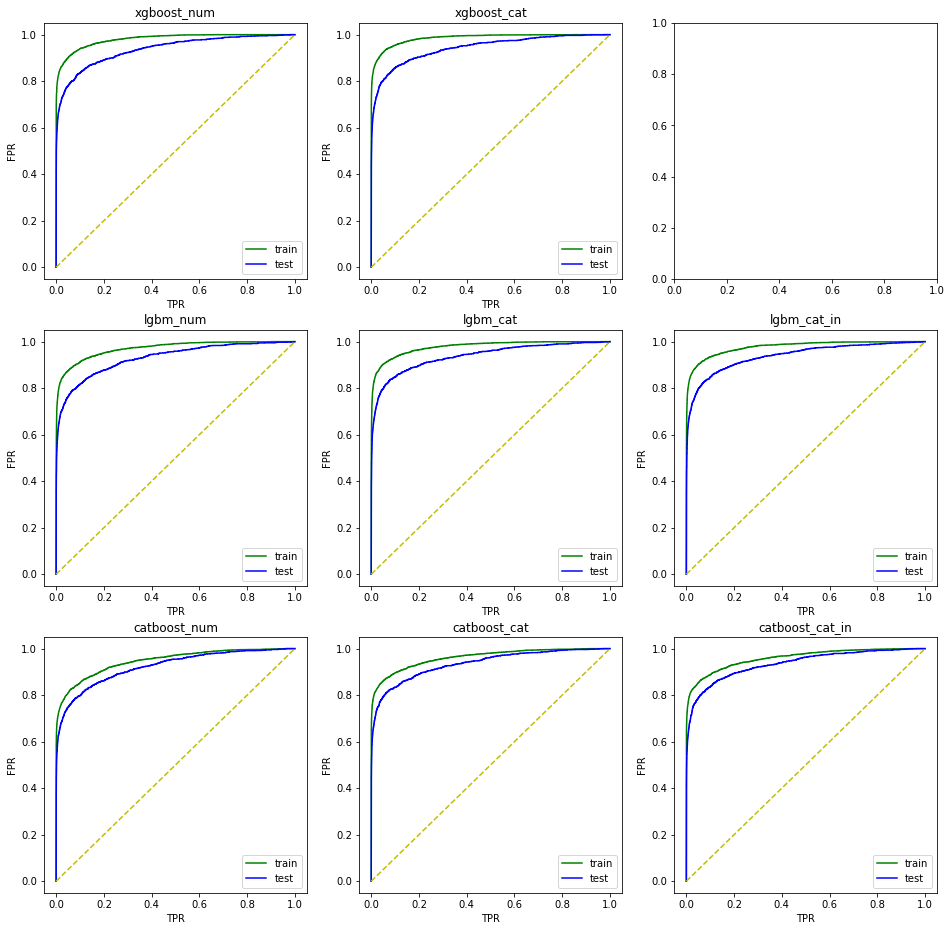

In [873]:
fig, axes = plt.subplots(3, 3, figsize=(16, 16))
ax=axes.flatten()
i=0
for alg_name, alg_par in A.items():
    for par in alg_par:
        if par:
            roc_auc_plot(i,par[1],(alg_name+'_'+par[0]),par[2])
        i+=1

In [593]:
# Из "коробки" лучшие показатели на тесте дает xgboost, он же сильнее других склонен к переобучению.
# lgbm дает средние показатели, у catboost наименьшая разница между тестом и трейном.

Задание 1: Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.

In [601]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

Text(0.5, 1.0, 'test')

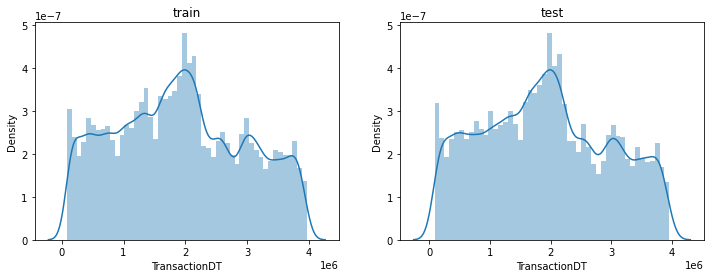

In [742]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.distplot(X_train.TransactionDT,ax=axes[0])
sns.distplot(X_test.TransactionDT,ax=axes[1])
axes[0].set_title('train')
axes[1].set_title('test')


In [605]:
# Распределения на тесте и трейне идентичны. Для данной задачи подойдет валидация на стратифицированных фолдах.

Задание 2: построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.

In [746]:
train

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,3166995,0,3958217,39.00,W,1877,310.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179996,3166996,0,3958237,59.95,W,10075,514.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179997,3166997,0,3958241,34.00,W,6053,122.0,150.0,mastercard,195.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179998,3166998,0,3958260,59.00,W,7726,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'TransactionAmt')

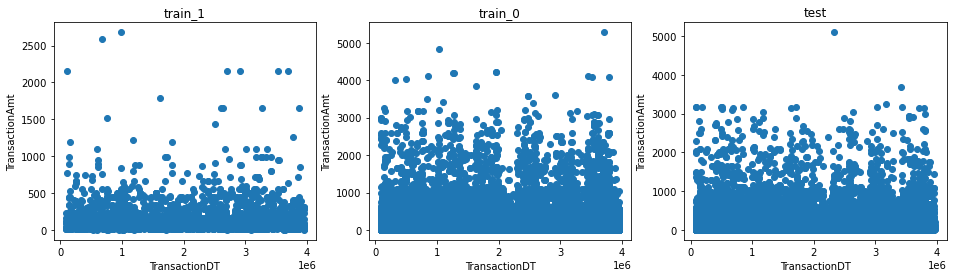

In [646]:
fig, axes = plt.subplots(1, 3, figsize=(16,4))
ax1,ax2,ax3=axes.flatten()

ax1.scatter(X_train[y_train==1].TransactionDT, X_train[y_train==1].TransactionAmt)
ax2.scatter(X_train[y_train==0].TransactionDT, X_train[y_train==0].TransactionAmt)
ax3.scatter(X_test.TransactionDT, X_test.TransactionAmt)

ax1.set_title('train_1')
ax2.set_title('train_0')
ax3.set_title('test')

ax1.set_xlabel('TransactionDT')
ax2.set_xlabel('TransactionDT')
ax3.set_xlabel('TransactionDT')

ax1.set_ylabel('TransactionAmt')
ax2.set_ylabel('TransactionAmt')
ax3.set_ylabel('TransactionAmt')

In [647]:
# Распределения идентичны, ярковыраженной зависимости не наблюдается, имеются выбросы.

Задание 3: построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.

<AxesSubplot:xlabel='TransactionAmt', ylabel='Density'>

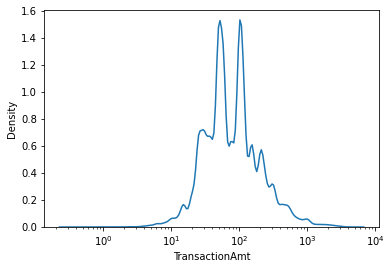

In [739]:
sns.kdeplot(train.TransactionAmt,log_scale=True)

In [876]:
# Приближается к нормальному, правый хвост тяжелый

Text(0.5, 1.0, 'test')

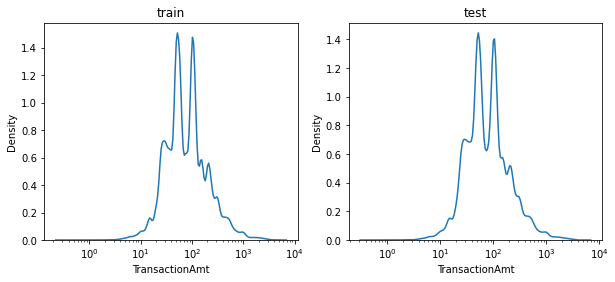

In [743]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.kdeplot(X_train.TransactionAmt,log_scale=True,ax=axes[0])
sns.kdeplot(X_test.TransactionAmt,log_scale=True,ax=axes[1])
axes[0].set_title('train')
axes[1].set_title('test')

In [735]:
# Идентично

Задание 4: построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.

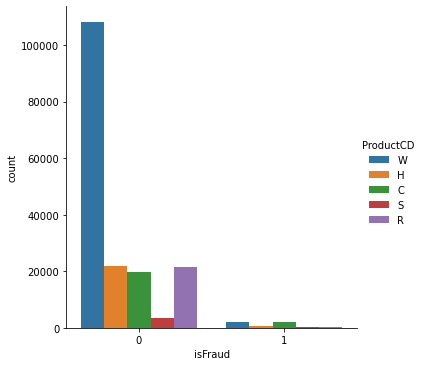

In [872]:

sns.catplot(x='isFraud',
            hue='ProductCD',
            kind='count',
            data=train);

In [ ]:
# Наибольший объем приходится на 'W', наибольшая доля класса 1 - на 'C'.

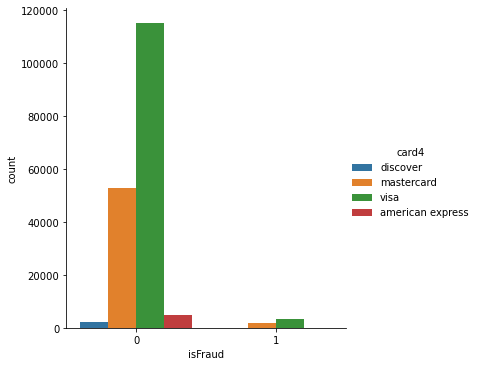

In [867]:
sns.catplot(x='isFraud',
            hue='card4',
            kind='count',
            data=train);

In [874]:
# Доминируют visa  и mastercard, доли класса 1 в них примерно одинаковы.

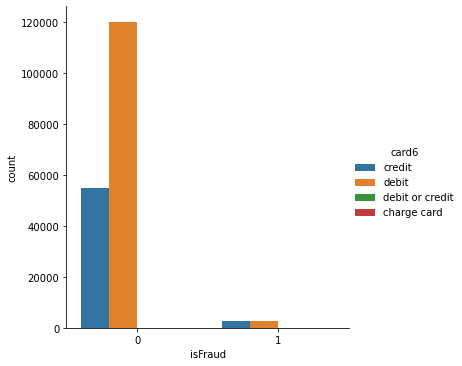

In [868]:
sns.catplot(x='isFraud',
            hue='card6',
            kind='count',
            data=train);

In [875]:
# Доминируют debit и credit, в debit доля класса 1 больше.